In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [6]:
df1 = pd.read_csv("D:/BITS Work/Semester 2/Innovation/Projects/ml_projects/Titanic/train.csv")
df2 = pd.read_csv("D:/BITS Work/Semester 2/Innovation/Projects/ml_projects/Titanic/test.csv")
df1["cabin_letter"] = df1["Cabin"].str[0]
df1["cabin_letter"] = df1["cabin_letter"].replace("C", "C_cabin")
df3 = pd.DataFrame(pd.get_dummies(df1["cabin_letter"]))
df4 = pd.DataFrame(pd.get_dummies(df1["Embarked"]))
df1 = pd.merge(df1,df3, left_index = True, right_index = True)
df1 = pd.merge(df1,df4, left_index = True, right_index = True)
df1.set_index("PassengerId", inplace=True)
df1.drop(["Name", "Ticket", "cabin_letter", "Embarked", "Cabin"], axis=1, inplace=True)
df1.dropna(inplace=True)
df1["Age"]/=100
df1["Fare"]/=100
Y_train = df1["Survived"]
X_train = df1.copy()
Y_train.columns = ["Survived"]
X_train.drop("Survived", axis=1, inplace=True)
X_train["Sex"] = X_train["Sex"].replace({"male":1, "female":0})
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train, Y_train, random_state=0)

In [7]:
X_train2

,Pclass,Sex,Age,SibSp,Parch,Fare,A,B,C_cabin,D,E,F,G,T,C,Q,S
424,2,0,0.07,0,2,0.262500,0,0,0,0,0,0,0,0,0,0,1
101,3,1,0.45,0,0,0.069750,0,0,0,0,0,0,0,0,0,0,1
391,3,1,0.21,0,0,0.072500,0,0,0,0,0,0,0,0,0,0,1
558,3,1,0.25,0,0,0.077417,0,0,0,0,0,0,0,0,0,1,0
250,3,1,0.28,0,0,0.078958,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2,1,0.28,0,0,0.105000,0,0,0,0,0,0,0,0,0,0,1
192,2,1,0.19,0,0,0.105000,0,0,0,0,0,0,0,0,0,0,1
629,1,1,0.46,0,0,0.792000,0,1,0,0,0,0,0,0,1,0,0
559,3,1,0.26,1,0,0.078542,0,0,0,0,0,0,0,0,0,0,1


In [8]:
dcf = DummyClassifier(strategy='most_frequent').fit(X_train2,Y_train2)    
dcf_predicted = dcf.predict(X_test2)
score3 = dcf.score(X_test2,Y_test2)
score1 = accuracy_score(Y_test2,dcf_predicted)
score2 = recall_score(Y_test2,dcf_predicted)
print(score1, score2)

0.5754189944134078 0.0


In [9]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_train2, Y_train2)
print(clf.score(X_train2,Y_train2),clf.score(X_test2,Y_test2))

0.8504672897196262 0.8044692737430168


In [10]:
r_clf = RandomForestClassifier(n_estimators = 2000, max_features=5, max_depth=6).fit(X_train2,Y_train2)
print(r_clf.score(X_train2,Y_train2),r_clf.score(X_test2,Y_test2))

0.8990654205607477 0.8100558659217877


In [11]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train2, Y_train2)
print(knn.score(X_train2, Y_train2),knn.score(X_test2, Y_test2))

0.822429906542056 0.7821229050279329


In [12]:
model = SVC(C = 1.15,gamma = 0.11).fit(X_train2, Y_train2)
print(model.score(X_train2, Y_train2), model.score(X_test2, Y_test2))

0.811214953271028 0.7932960893854749


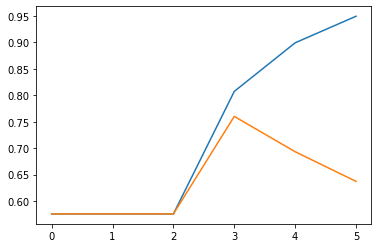

In [13]:
param_range = np.logspace(-5,1,6)
train_scores,test_scores = validation_curve(SVC(kernel='rbf',C=1,random_state=0),
                                            X_test2,Y_test2,param_name='gamma',param_range=param_range,
                                            scoring='accuracy',cv=3)
mean_array=[]
mean_test_array=[]
for i in range (train_scores.shape[0]):
    mean = np.mean(train_scores[i])
    mean_array.append(mean)
    mean = np.mean(test_scores[i])
    mean_test_array.append(mean)
plt.figure()
plt.plot(mean_array)
plt.plot(mean_test_array)

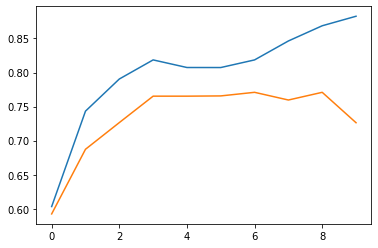

In [14]:
param_range = np.logspace(-1,1,10)
train_scores,test_scores = validation_curve(SVC(kernel='rbf',gamma=0.11,random_state=0),
                                            X_test2,Y_test2,param_name='C',param_range=param_range,
                                            scoring='accuracy',cv=3)
mean_array=[]
mean_test_array=[]
for i in range (train_scores.shape[0]):
    mean = np.mean(train_scores[i])
    mean_array.append(mean)
    mean = np.mean(test_scores[i])
    mean_test_array.append(mean)
plt.figure()
plt.plot(mean_array)
plt.plot(mean_test_array)

In [15]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state=0)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train2,Y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   50.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [16]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [17]:
clf = RandomForestClassifier(n_estimators= 600,min_samples_split= 10,min_samples_leaf= 2,max_features= 'sqrt',max_depth= 60,bootstrap=True)
clf.fit(X_train2,Y_train2)
clf.score(X_test2,Y_test2)

0.7932960893854749

In [18]:
df2["cabin_letter"] = df2["Cabin"].str[0]
df2["cabin_letter"] = df2["cabin_letter"].replace("C", "C_cabin")
df3 = pd.DataFrame(pd.get_dummies(df2["cabin_letter"]))
df4 = pd.DataFrame(pd.get_dummies(df2["Embarked"]))
df2 = pd.merge(df2,df3, left_index = True, right_index = True)
df2 = pd.merge(df2,df4, left_index = True, right_index = True)
df2.set_index("PassengerId",inplace=True)
df2.drop(["Name", "Ticket", "cabin_letter", "Embarked", "Cabin"], axis=1, inplace=True)
df2["Age"].fillna(np.mean(df2["Age"]),inplace=True)
df2["Fare"].fillna(np.mean(df2["Fare"]),inplace=True)
df2["Age"]/=100
df2["Fare"]/=100
df2["Sex"] = df2["Sex"].replace({"male":1, "female":0})
df2["T"]=0
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,A,B,C_cabin,D,E,F,G,C,Q,S,T
PassengerId,,,,,,,,,,,,,,,,,
892,3,1,0.345000,0,0,0.078292,0,0,0,0,0,0,0,0,1,0,0
893,3,0,0.470000,1,0,0.070000,0,0,0,0,0,0,0,0,0,1,0
894,2,1,0.620000,0,0,0.096875,0,0,0,0,0,0,0,0,1,0,0
895,3,1,0.270000,0,0,0.086625,0,0,0,0,0,0,0,0,0,1,0
896,3,0,0.220000,1,1,0.122875,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,0.302726,0,0,0.080500,0,0,0,0,0,0,0,0,0,1,0
1306,1,0,0.390000,0,0,1.089000,0,0,1,0,0,0,0,1,0,0,0
1307,3,1,0.385000,0,0,0.072500,0,0,0,0,0,0,0,0,0,1,0


In [23]:
ans = r_clf.predict(df2)

In [24]:
final_df = pd.DataFrame(df2.index)
final_df["Survived"] = ans
final_df.set_index("PassengerId",inplace=True)
final_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [25]:
final_df.to_csv("D:/BITS Work/Semester 2/Innovation/Projects/ml_projects/Titanic/result2.csv")